In [14]:
#Notebook para fazer prediçao de fator fotoeletrico - XGBoost

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import seaborn as sns

from sklearn.model_selection import GridSearchCV

# para otimização dos parâmetros
from hyperopt import fmin, hp, anneal, Trials
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn import preprocessing

from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPClassifier

#import lasio

from imblearn.over_sampling import SMOTE

In [15]:
# Carregar os dados salvos do Notebook1

file1 = 'df.csv' #dados escalonados
file2 = 'df_base.csv' #dados sem escalamento

df = pd.read_csv(file1)
df_base = pd.read_csv(file2) #nao escalonado

In [16]:
#mantendo apenas colunas necessarias para previsao de fe cabo

selected_columns = ['GR_LWD','fator_foto_LWD','caliper_LWD','densidade_LWD','neutrons_LWD','fator_foto_cabo', 'poco']

df_fe = df[selected_columns]
df_basefe = df_base[selected_columns]

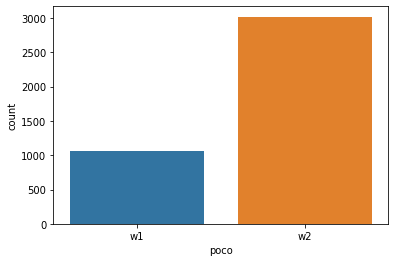

In [17]:
#verificando se está desbalanceado
ax = sns.countplot(x='poco', data=df_fe)

In [18]:
#Preparando para fazer o balancemento
X = df_fe.drop("poco", axis = 1)
y = df_fe.poco

#fazer o mesmo para o df_base

Xbase = df_basefe.drop("poco", axis = 1)
ybase = df_basefe.poco

smt = SMOTE()

X, y = smt.fit_sample(X, y)
Xbase, ybase = smt.fit_sample(Xbase, ybase)

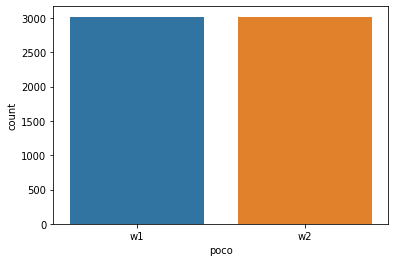

In [19]:
# verificar se ficou balanceado
ax = sns.countplot(x=y)

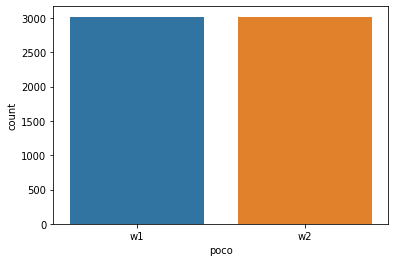

In [20]:
# verificar se ficou balanceado (aados nao escalonados)
ax = sns.countplot(x=ybase)

In [21]:
# preparando y e X para a rede
y = X.fator_foto_cabo
X = X.drop("fator_foto_cabo", axis = 1)

#fazendo o mesmo para df_base
ybase = Xbase.fator_foto_cabo
Xbase = Xbase.drop("fator_foto_cabo", axis = 1)

In [22]:
df_fe = pd.DataFrame(X)

In [23]:
#preparando para a rede

X = df_fe  #--> pega dados de entrada escalonados 
y = ybase #--> pega alvo não escalonado

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [24]:
from xgboost import XGBRegressor
# XGboost
xgb = XGBRegressor()


In [25]:
#otimizacao de parametros XGBoost 
# rodar somente uma vez e depois deixar comentado.


#space = {'n_estimators':      hp.quniform('n_estimators', 50, 500, 1), # 50, 500, 1
#         'max_depth':         hp.quniform('max_depth', 2, 50, 1), # 2, 50, 1
#         'min_child_weight':  hp.quniform('min_child_weight', 1, 50, 1),#  1, 50, 1
#         'gamma':             hp.loguniform('gamma', np.log(0.0001), np.log(5)) - 0.0001,
#         'subsample':         hp.uniform('subsample', 0.5, 1),
#         'colsample_bytree':  hp.uniform('colsample_bytree', 0.75, 1), # 0.5, 1
#         'colsample_bylevel': hp.uniform('colsample_bylevel', 0.75, 1), # 0.5, 1
#         'reg_alpha':         hp.loguniform('reg_alpha', np.log(0.0001), np.log(1)) - 0.0001,
#         'reg_lambda':        hp.loguniform('reg_lambda', np.log(1), np.log(4)),
#         'learning_rate':     hp.loguniform('learning_rate', -5, 0)}


#kfold = KFold(n_splits=10, shuffle=True, random_state=10)

In [26]:
#def gb_r2_cv(params, X=X_train, y=y_train, X_test=X_test, y_test=y_test, cv=kfold, random_state=111):
#    params = {'n_estimators':      int(params['n_estimators']),
#              'max_depth':         int(params['max_depth']),
#              'min_child_weight':  int(params['min_child_weight']),
#              'gamma':             params['gamma'],
#              'subsample':         params['subsample'],
#              'colsample_bytree':  params['colsample_bytree'],
#              'colsample_bylevel': params['colsample_bylevel'],
#              'reg_alpha':         params['reg_alpha'],
#              'reg_lambda':        params['reg_lambda'],
#              'learning_rate':     params['learning_rate']}
#    xgb = XGBRegressor(random_state=random_state, **params)
#    score_cv = cross_val_score(xgb, X, y, cv=cv, scoring='r2', n_jobs=-1).mean()
#    xgb.fit(X,y)
#    score_va = r2_score(y_test, xgb.predict(X_test))
#    score = 1 - (score_cv+score_va)/2
#    return score

In [27]:
#rodar para otimizar e depois comentar
#trials = Trials()
#best   = fmin(fn=gb_r2_cv, space=space, algo=anneal.suggest, max_evals=50, trials=trials,
#              rstate=np.random.RandomState(111))

In [28]:
#xgb    = XGBRegressor(n_estimators =      int(best['n_estimators']),
#                      max_depth =         int(best['max_depth']),
#                      min_child_weight =  int(best['min_child_weight']),
#                      gamma =             best['gamma'],
#                      subsample =         best['subsample'],
#                      colsample_bytree =  best['colsample_bytree'],
#                      colsample_bylevel = best['colsample_bylevel'],
#                      reg_alpha =         best['reg_alpha'],
#                      reg_lambda =        best['reg_lambda'],
#                      learning_rate =     best['learning_rate'],
#                      random_state =      111)

In [29]:
#print("n_estimators",best['n_estimators']),
#print("max_depth",best['max_depth']),
#print("min_child_weight",best['min_child_weight']),
#print("gamma",best['gamma'])
#print("subsample",best['subsample'])
#print("colsample bytree",best['colsample_bytree'])
#print("colsample by level",best['colsample_bylevel'])
#print("reg_alpha",best['reg_alpha'])
#print("reg_lambda",best['reg_lambda'])
#print("learning rate",best['learning_rate'])

In [30]:
# XGB otimizado
xgb    = XGBRegressor(n_estimators =     276,
                      max_depth =         11,
                      min_child_weight =  19,
                      gamma =             0.06459585001705498,
                      subsample =         0.8186748963752992,
                      colsample_bytree =  0.6141126402333327,
                      colsample_bylevel = 0.8863183068889218,
                      reg_alpha =         0.0006584638828410796,
                      reg_lambda =        2.4854801784144382,
                      learning_rate =     0.036289118618980425,
                      random_state =      111)

In [31]:

# treinando o modelo utilizando o conjunto de treino
xgb.fit(X_train,y_train)


XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.8863183068889218, colsample_bynode=1,
             colsample_bytree=0.6141126402333327, gamma=0.06459585001705498,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.036289118618980425, max_delta_step=0, max_depth=11,
             min_child_weight=19, missing=nan, monotone_constraints='()',
             n_estimators=276, n_jobs=48, num_parallel_tree=1, random_state=111,
             reg_alpha=0.0006584638828410796, reg_lambda=2.4854801784144382,
             scale_pos_weight=1, subsample=0.8186748963752992,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
# predizendo o teste
y_pred = xgb.predict(X_test)

/usr/local/lib64/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


In [33]:
test_mse = mean_squared_error(y_test,y_pred)
print('Test MSE',test_mse)


Test MSE 0.1901597088897362


In [34]:
resultado = pd.DataFrame(list(zip(y_test, y_pred)), 
               columns =['real', 'previsto'])

resultado.head(10)

,real,previsto
0,4.442123,4.649237
1,4.949067,4.672194
2,5.019800,4.781010
3,4.421200,4.498776
4,5.528000,4.671517
5,4.266900,4.613164
6,4.701582,4.624577
7,3.828662,4.610141
8,3.732600,4.686871
9,4.649100,4.629077


In [35]:
r2_score(resultado.real, resultado.previsto)

0.32813691958171154

In [36]:
#Fazendo predict para todos os dados
y_total = xgb.predict(X)

resultado = pd.DataFrame(list(zip(y, y_total)), 
               columns =['real', 'previsto'])

resultado.head(10)

/usr/local/lib64/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


,real,previsto
0,4.0581,4.322613
1,4.2562,4.302802
2,4.1880,4.183094
3,4.0111,4.223082
4,3.8406,4.223440
5,3.7241,4.084491
6,3.7738,4.096349
7,3.9604,4.156207
8,4.1767,4.301744
9,4.2579,4.419093


Text(0.5, 1.0, 'FE - Cabo x LWD - AJUSTE XGB')

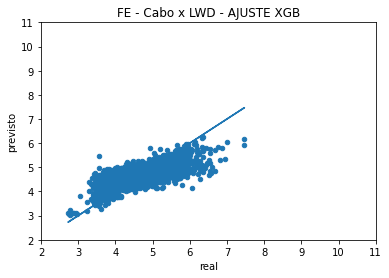

In [37]:
resultado.plot(kind='scatter', x='real', y='previsto',vmin=0, vmax=150)
plt.plot(resultado["real"],resultado["real"])
plt.xlim(2,11)
plt.ylim(2,11)
plt.title("FE - Cabo x LWD - AJUSTE XGB")

Text(0.5, 1.0, 'FE - Cabo x LWD - KDE - ajuste XGB')

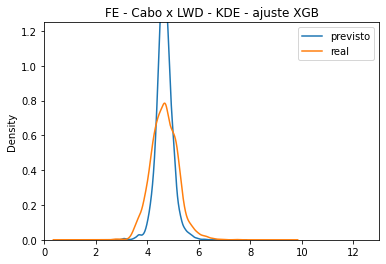

In [38]:

resultado.previsto.plot(kind='kde')
resultado.real.plot(kind='kde')
plt.xlim(0,13)
plt.ylim(0, 1.25) #ylim upper may change depending on data
plt.legend()
plt.title("FE - Cabo x LWD - KDE - ajuste XGB")


In [39]:
# Gerando previsao para os poços
normalizer   = StandardScaler()

# w1

dfw1 = df_base[df_base['poco'] == 'w1']
dfw1_fe = dfw1[selected_columns]
dfw1_fe = dfw1_fe.drop(columns=['fator_foto_cabo'])
dfw1_fe = dfw1_fe.drop(columns=['poco'])

xw1 = dfw1_fe.values
xw1_scaled = normalizer.fit_transform(xw1)
dfw1_fe = pd.DataFrame(xw1_scaled)
Xw1 = dfw1_fe

# w2

dfw2 = df_base[df_base['poco'] == 'w2']
dfw2_fe = dfw2[selected_columns]
dfw2_fe = dfw2_fe.drop(columns=['fator_foto_cabo'])
dfw2_fe = dfw2_fe.drop(columns=['poco'])

xw2 = dfw2_fe.values
xw2_scaled = normalizer.fit_transform(xw2)
dfw2_fe = pd.DataFrame(xw2_scaled)
Xw2 = dfw2_fe

In [40]:
fe_w1 = xgb.predict(Xw1)
fe_w2 = xgb.predict(Xw2)


/usr/local/lib64/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


In [41]:
dfw1_previsao = pd.DataFrame(list(zip(dfw1.DEPTH, dfw1.fator_foto_cabo, dfw1.fator_foto_LWD, fe_w1)), 
               columns =['Depth', 'fator_foto_cabo','fator_foto_LWD','fator_foto_previsto'])


dfw2_previsao = pd.DataFrame(list(zip(dfw2.DEPTH, dfw2.fator_foto_cabo, dfw2.fator_foto_LWD, fe_w2)), 
               columns =['Depth', 'fator_foto_cabo','fator_foto_LWD','fator_foto_previsto'])


In [42]:
mse = mean_squared_error(dfw1_previsao.fator_foto_cabo,dfw1_previsao.fator_foto_previsto)
print('MSE w1',mse)

MSE w1 0.12870273480672337


In [43]:
mse = mean_squared_error(dfw2_previsao.fator_foto_cabo,dfw2_previsao.fator_foto_previsto)
print('MSE w2',mse)

MSE w2 0.07468231242662515


In [44]:
print('R2 FE - XGB w1',r2_score(dfw1_previsao.fator_foto_cabo, dfw1_previsao.fator_foto_previsto))


R2 FE - XGB w1 0.5181955974865669


In [45]:
print('R2 FE - XGB w2',r2_score(dfw2_previsao.fator_foto_cabo, dfw2_previsao.fator_foto_previsto))

R2 FE - XGB w2 0.7184025316598426


Text(0.5, 1.0, 'FE w2- Cabo x previsto')

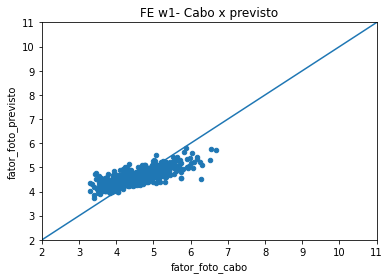

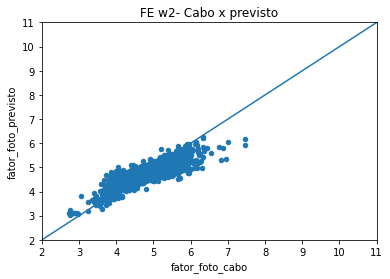

In [46]:
dfw1_previsao.plot(kind='scatter', x='fator_foto_cabo', y='fator_foto_previsto',vmin=0, vmax=150)
plt.plot([2, 11], [2, 11])
plt.xlim(2,11)
plt.ylim(2,11)
plt.title("FE w1- Cabo x previsto")

dfw2_previsao.plot(kind='scatter', x='fator_foto_cabo', y='fator_foto_previsto',vmin=0, vmax=150)
plt.plot([2, 11], [2, 11])
plt.xlim(2,11)
plt.ylim(2,11)
plt.title("FE w2- Cabo x previsto")

Text(0.5, 1.0, 'FE - Cabo x LWD - KDE - ajuste XGB - w1')

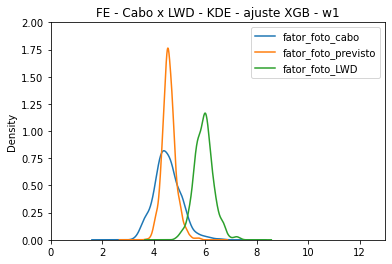

In [47]:
dfw1_previsao.fator_foto_cabo.plot(kind='kde')
dfw1_previsao.fator_foto_previsto.plot(kind='kde')
dfw1_previsao.fator_foto_LWD.plot(kind='kde')
plt.xlim(0,13)
plt.ylim(0, 2.0) #ylim upper may change depending on data
plt.legend()
plt.title("FE - Cabo x LWD - KDE - ajuste XGB - w1")

Text(0.5, 1.0, 'FE - Cabo x LWD - KDE - ajuste XGB - w2')

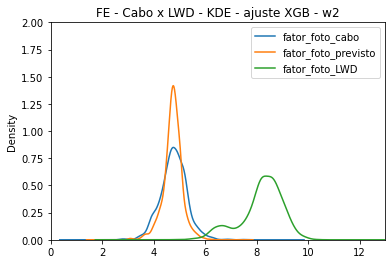

In [48]:
dfw2_previsao.fator_foto_cabo.plot(kind='kde')
dfw2_previsao.fator_foto_previsto.plot(kind='kde')
dfw2_previsao.fator_foto_LWD.plot(kind='kde')
plt.xlim(0,13)
plt.ylim(0, 2.0) #ylim upper may change depending on data
plt.legend()
plt.title("FE - Cabo x LWD - KDE - ajuste XGB - w2")

In [49]:
# função para plotar perfis e comparar dois a dois

def log_plot(logs):
    logs = logs.sort_values(by='Depth')
    top = logs.Depth.min()
    bot = logs.Depth.max()
    
    f, ax = plt.subplots(nrows=1, ncols=3, figsize=(6,8))
    ax[0].plot(logs.fator_foto_LWD, logs.Depth, color='green')
    ax[0].plot(logs.fator_foto_cabo, logs.Depth, color='red')
    ax[0].plot(logs.fator_foto_previsto, logs.Depth, color='blue')
    ax[1].plot(logs.fator_foto_cabo, logs.Depth, color='red')
    ax[1].plot(logs.fator_foto_previsto, logs.Depth, color='blue')
    ax[2].plot(logs.fator_foto_LWD, logs.Depth, color='green')
    ax[2].plot(logs.fator_foto_cabo, logs.Depth, color='red')
    

    for i in range(len(ax)):
        ax[i].set_ylim(top,bot)
        ax[i].invert_yaxis()
        ax[i].grid()
        
    ax[0].set_xlabel("Fator fotoeletrico")
    ax[0].set_xlim(logs.fator_foto_cabo.min(),logs.fator_foto_LWD.max())
    ax[0].set_ylabel("Depth")
#    ax[1].set_xlabel("caliper")
#    ax[1].set_xlim(logs.caliper_cabo.min(),logs.caliper_LWD.max())
#    ax[2].set_xlabel("densidade")
#    ax[2].set_xlim(logs.densidade_LWD.min(),logs.densidade_cabo.max())
    ax[1].set_xlabel("FE - cabo x previsto")
    ax[1].set_xlim(logs.fator_foto_cabo.min(),logs.fator_foto_cabo.max())
    ax[2].set_xlabel("FE cabo x LWD")
    ax[2].set_xlim(logs.fator_foto_cabo.min(),logs.fator_foto_LWD.max())
#    ax[5].set_xlabel("corr. perfil dens")
#    ax[5].set_xlim(logs.correcao_perfil_densidade_cabo.min(),logs.correcao_perfil_densidade_LWD.max())

#    f.suptitle('Well: xxxx', fontsize=14,y=0.94)

In [50]:
#transformar profundidade em coluna para usar no plot em seguida
dfw1_previsao['Depth'] = dfw1_previsao.index
dfw2_previsao['Depth'] = dfw2_previsao.index


w1


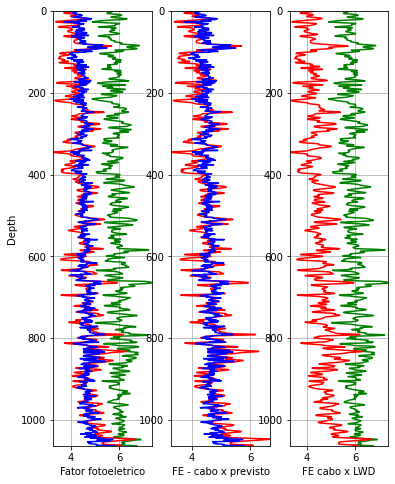

In [51]:
log_plot(dfw1_previsao)
print('w1')


w2


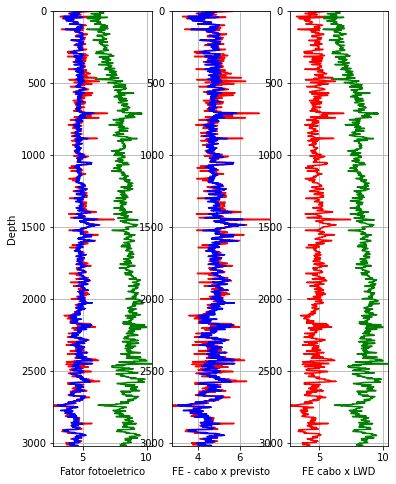

In [52]:
log_plot(dfw2_previsao)
print('w2')